In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, matthews_corrcoef

import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/mini project/creditcard.csv")

#**Data Preprocessing**

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Handling Missing Values

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Distribution Analysis

In [ ]:
print(pd.value_counts(data['Class']).sort_index())

0    284315
1       492
Name: Class, dtype: int64


492
284315


Text(0.5, 1.0, 'Class distribution of the target variable')

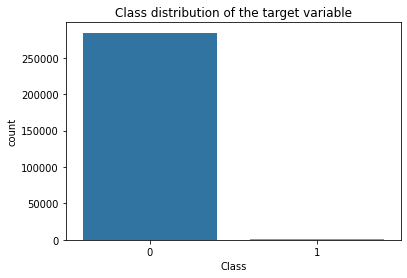

In [ ]:
Fraud = data[data["Class"]==1]
Valid = data[data["Class"]==0]
print(len(Fraud))
print(len(Valid))
sns.countplot(x="Class",data=data)
plt.title("Class distribution of the target variable")

Distribution of classes with respect to time

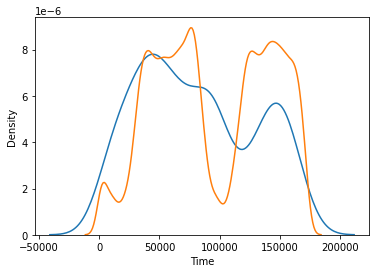

In [ ]:
fraud_data = data[data["Class"]==1]
non_fraud_data = data[data["Class"]==0]
ax = sns.distplot(fraud_data['Time'],label = 'fraud',hist=False)
ax = sns.distplot(non_fraud_data['Time'],label='non fraud',hist=False)
plt.show()

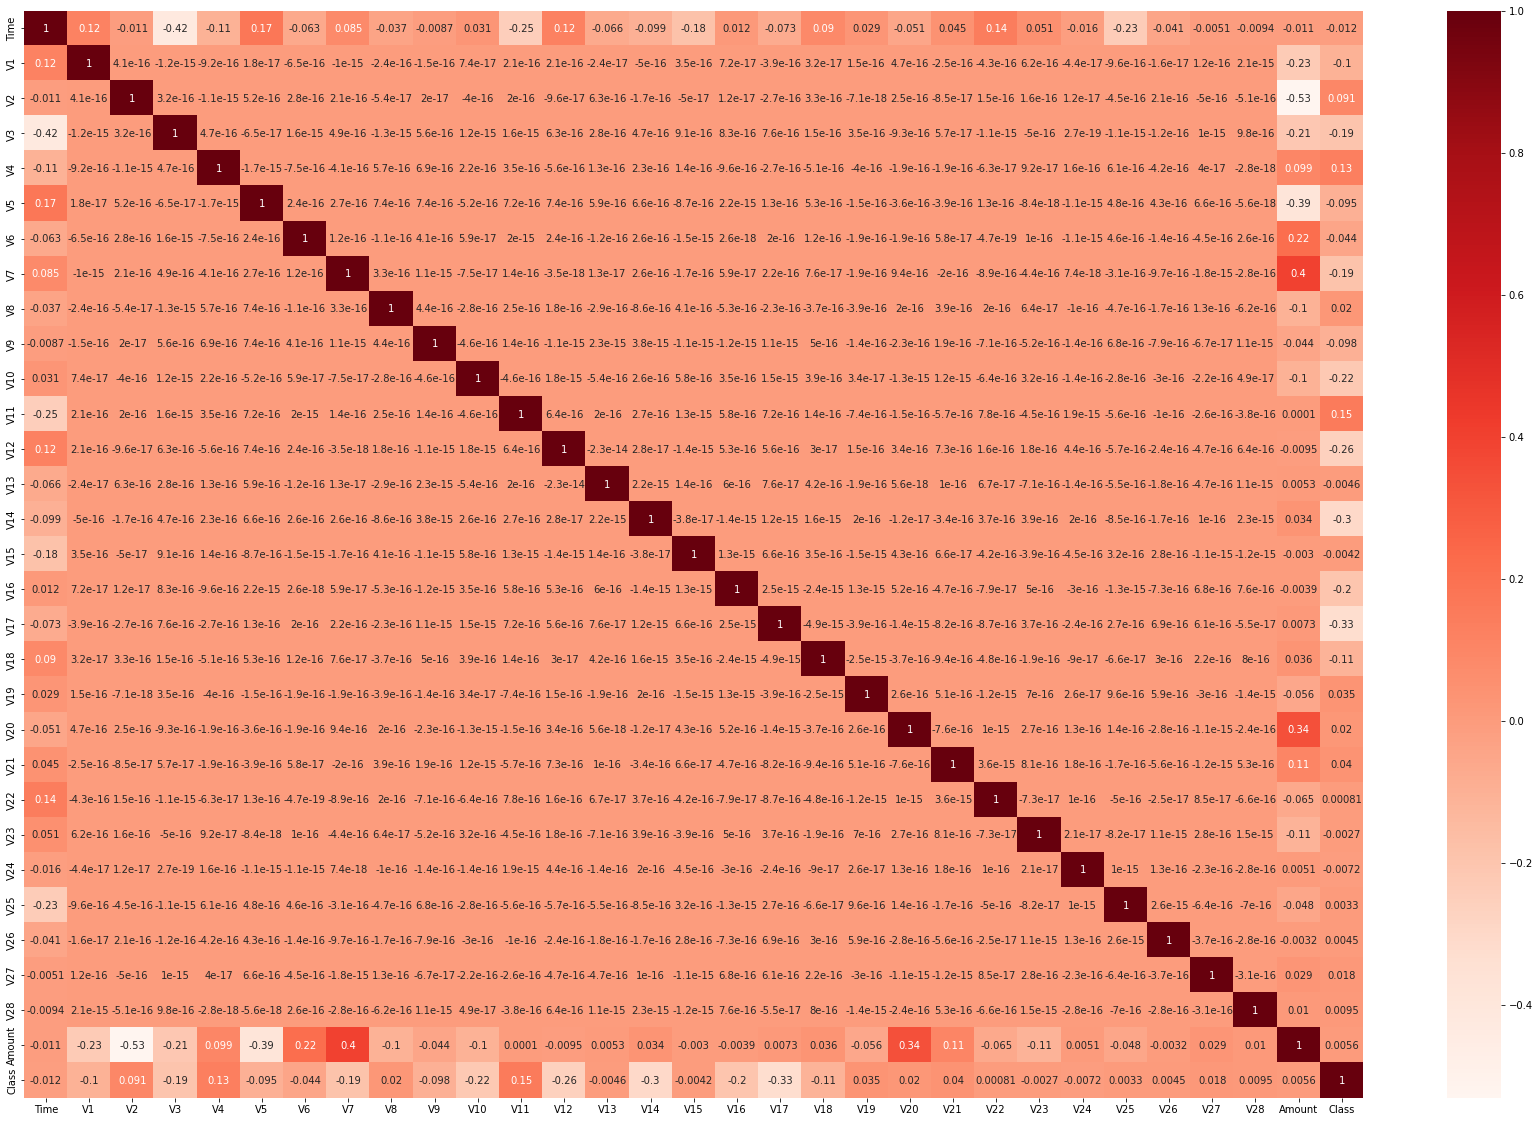

In [ ]:
plt.figure(figsize=(30,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
data = data.drop(['Time'],axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1,1))
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("before smote: ",Counter(y))
smote=SMOTE(random_state=0)
X_smote,y_smote = smote.fit_resample(X,y)
print("after smote:  ",Counter(y_smote))


before smote:  Counter({0: 284315, 1: 492})
after smote:   Counter({0: 284315, 1: 284315})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, random_state=1, test_size=0.3)

In [ ]:
print("X train shape: ",X_train.shape)
print("X test shape: ",X_test.shape)
print("Y train shape: ",y_train.shape)
print("Y test shape: ",y_test.shape)

X train shape:  (398041, 29)
X test shape:  (170589, 29)
Y train shape:  (398041,)
Y test shape:  (170589,)




```
# This is formatted as code
```

#**Random Forest Classifier**

In [ ]:

random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
yrf_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.9998768971035648

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = random_forest, X = X_train, y = y_train)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.99 %
Standard Deviation: 0.00 %


#**Performance Metrics**

In [ ]:
cnf_rf = confusion_matrix(y_test,yrf_pred)

In [ ]:
def print_metrics(cm):
  TP  = cm[1][1]
  TN = cm[0][0]
  FP = cm[0][1]
  FN = cm[1][0]
  accuracy = (TP+TN)/(TP+TN+FP+FN)
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  print("Accuracy(%):",accuracy*100)
  print("Precision(%): ",precision*100)
  print("Recall(%): ",recall*100)

In [ ]:
print_metrics(cnf_rf)
print("MCC: ",matthews_corrcoef(y_test,yrf_pred))

Accuracy(%): 99.98768971035648
Precision(%):  99.97542077295817
Recall(%):  100.0
MCC:  0.9997538239135595


In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

[[85151    21]
 [    0 85417]]


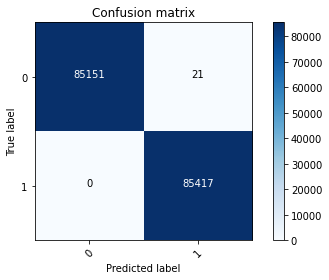

In [ ]:
plot_confusion_matrix(cnf_rf,classes=[0,1])

[link text](https://)#**Decision Tree**

In [ ]:

decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=1)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
ydt_pred = decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

0.9981241463400337

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = decision_tree, X = X_train, y = y_train)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.82 %
Standard Deviation: 0.02 %


In [ ]:
cnf_dt = confusion_matrix(y_test,ydt_pred)

In [ ]:
print_metrics(cnf_dt)
print("MCC: ",matthews_corrcoef(y_test,ydt_pred))

Accuracy(%): 99.81241463400336
Precision(%):  99.73233592425925
Recall(%):  99.89346383038506
MCC:  0.9962495801660309


[[84943   229]
 [   91 85326]]


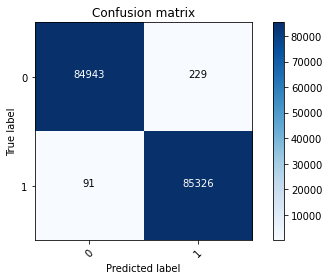

In [ ]:
plot_confusion_matrix(cnf_dt,classes = [0,1])

#**Logistic Regression**

In [ ]:
logistic_reg = LogisticRegression(random_state = 1)
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
lr_pred = logistic_reg.predict(X_test)
logistic_reg.score(X_test,y_test)

0.9446564549883052

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logistic_reg, X = X_train, y = y_train)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.59 %
Standard Deviation: 0.11 %


In [ ]:
cnf_lr = confusion_matrix(y_test,lr_pred)

In [ ]:
print_metrics(cnf_lr)
print("MCC: ",matthews_corrcoef(y_test,lr_pred))

Accuracy(%): 94.46564549883053
Precision(%):  97.27109828028172
Recall(%):  91.5145696992402
MCC:  0.8908877819473358


[[82979  2193]
 [ 7248 78169]]


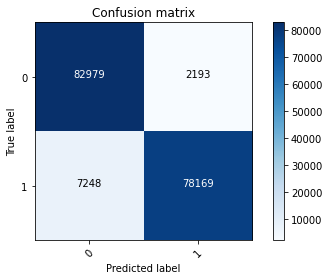

In [ ]:
plot_confusion_matrix(cnf_lr,classes = [0,1])

#**XGBoost**

In [ ]:
xg_boost = XGBClassifier(random_state=1)
xg_boost.fit(X_train,y_train)

XGBClassifier(random_state=1)

In [ ]:
xg_boost.score(X_test,y_test)

0.9766397598907315

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xg_boost, X = X_train, y = y_train)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.69 %
Standard Deviation: 0.09 %


In [ ]:
xg_pred = xg_boost.predict(X_test)

In [ ]:
cnf_xg = confusion_matrix(y_test,xg_pred)

In [ ]:
print_metrics(cnf_xg)
print("MCC: ",matthews_corrcoef(y_test,xg_pred))

Accuracy(%): 97.66397598907315
Precision(%):  98.79557057596894
Recall(%):  96.5112331268951
MCC:  0.9535366181564433


[[84167  1005]
 [ 2980 82437]]


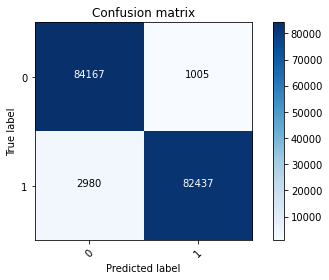

In [ ]:
plot_confusion_matrix(cnf_xg,classes = [0,1])

#**Extra Tree Classifier**

In [ ]:
extra_tree = ExtraTreesClassifier(random_state=1)
extra_tree.fit(X_train,y_train)

ExtraTreesClassifier(random_state=1)

In [ ]:
extra_tree_pred = extra_tree.predict(X_test)
extra_tree.score(X_test,y_test)

0.9999003452743143

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = extra_tree, X = X_train, y = y_train)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 99.99 %
Standard Deviation: 0.00 %


In [ ]:
cnf_et = confusion_matrix(y_test,extra_tree_pred)

In [ ]:
print_metrics(cnf_et)
print("MCC: ",matthews_corrcoef(y_test,extra_tree_pred))

Accuracy(%): 99.99003452743142
Precision(%):  99.98010159889506
Recall(%):  100.0
MCC:  0.9998007099387293


[[85155    17]
 [    0 85417]]


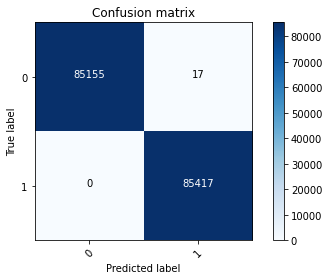

In [ ]:
plot_confusion_matrix(cnf_et,classes=[0,1])

#**AdaBoost with Random Forest**

Accuracy(%): 99.98827591462522
Precision(%):  99.97659093835225
Recall(%):  100.0
MCC:  0.9997655452144019
[[85152    20]
 [    0 85417]]


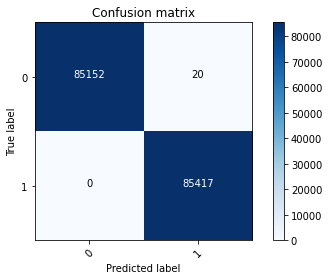

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
rf_ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(),random_state=1)
rf_ada.fit(X_train,y_train)
rf_ada_pred = rf_ada.predict(X_test)
cnf_rf_ada = confusion_matrix(y_test,rf_ada_pred)
print_metrics(cnf_rf_ada)
print("MCC: ",matthews_corrcoef(y_test,rf_ada_pred))
plot_confusion_matrix(cnf_rf_ada,classes=[0,1])

#**Adaboost with decision tree**

Accuracy(%): 99.98827591462522
Precision(%):  99.97659093835225
Recall(%):  100.0
MCC:  0.9997655452144019
[[85152    20]
 [    0 85417]]


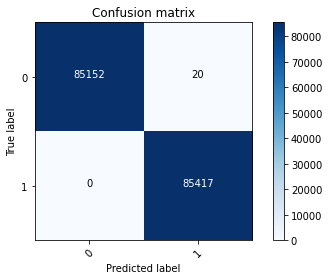

In [ ]:
dt_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=1)
dt_ada.fit(X_train,y_train)
dt_ada_pred = rf_ada.predict(X_test)
cnf_dt_ada = confusion_matrix(y_test,dt_ada_pred)
print_metrics(cnf_dt_ada)
print("MCC: ",matthews_corrcoef(y_test,dt_ada_pred))
plot_confusion_matrix(cnf_dt_ada,classes=[0,1])

#**Adaboost with Extra Tree**

Accuracy(%): 99.98768971035648
Precision(%):  99.97542077295817
Recall(%):  100.0
MCC:  0.9997538239135595
[[85151    21]
 [    0 85417]]


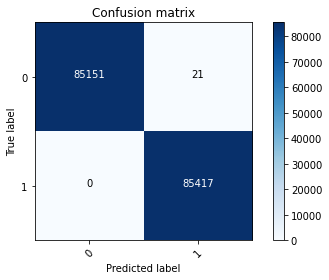

In [ ]:
et_ada = AdaBoostClassifier(base_estimator=ExtraTreesClassifier(),random_state=1)
et_ada.fit(X_train,y_train)
et_ada_pred = et_ada.predict(X_test)
cnf_et_ada = confusion_matrix(y_test,et_ada_pred)
print_metrics(cnf_et_ada)
print("MCC: ",matthews_corrcoef(y_test,et_ada_pred))
plot_confusion_matrix(cnf_et_ada,classes=[0,1])

#**Adaboost with Logistic Regression**

Accuracy(%): 93.58340807437759
Precision(%):  97.14607680522671
Recall(%):  89.82403971106454
MCC:  0.874174998692713
[[82918  2254]
 [ 8692 76725]]


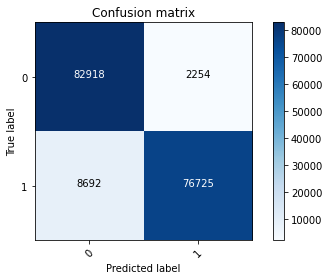

In [ ]:
lr_ada = AdaBoostClassifier(base_estimator=LogisticRegression(),random_state=1)
lr_ada.fit(X_train,y_train)
lr_ada_pred = lr_ada.predict(X_test)
cnf_lr_ada = confusion_matrix(y_test,lr_ada_pred)
print_metrics(cnf_lr_ada)
print("MCC: ",matthews_corrcoef(y_test,lr_ada_pred))
plot_confusion_matrix(cnf_lr_ada,classes=[0,1])

#Random forest without Smote and Adaboost

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [ ]:
random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
yrf_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.9995201479348805

In [ ]:
cnf_rf_withoutsada = confusion_matrix(y_test,yrf_pred)
print_metrics(cnf_rf_withoutsada)
print("MCC: ",matthews_corrcoef(y_test,yrf_pred))

Accuracy(%): 99.95201479348805
Precision(%):  94.16666666666667
Recall(%):  76.87074829931973
MCC:  0.850577831224011


#XGBoost without SMOTE and Adaboost

In [ ]:
xg_boost = XGBClassifier(random_state=1)
xg_boost.fit(X_train,y_train)

XGBClassifier(random_state=1)

In [ ]:
xg_pred = xg_boost.predict(X_test)
xg_boost.score(X_test,y_test)

0.9994850368081645

In [ ]:
cnf_xg_withoutsada = confusion_matrix(y_test,xg_pred)
print_metrics(cnf_xg_withoutsada)
print("MCC: ",matthews_corrcoef(y_test,xg_pred))

Accuracy(%): 99.94850368081644
Precision(%):  92.56198347107438
Recall(%):  76.19047619047619
MCC:  0.8395379651078461


#Extra Tree without SMOTE and Adaboost

In [ ]:
extra_tree = ExtraTreesClassifier(random_state=1)
extra_tree.fit(X_train,y_train)

ExtraTreesClassifier(random_state=1)

In [ ]:
extra_tree_pred = extra_tree.predict(X_test)
extra_tree.score(X_test,y_test)

0.9995435553526912

In [ ]:
cnf_et_withoutsada = confusion_matrix(y_test,extra_tree_pred)
print_metrics(cnf_et_withoutsada)
print("MCC: ",matthews_corrcoef(y_test,extra_tree_pred))

Accuracy(%): 99.95435553526913
Precision(%):  95.76271186440678
Recall(%):  76.87074829931973
MCC:  0.8577719440813301


#Decision Tree without SMOTE and Adaboost

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=1)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
ydt_pred = decision_tree.predict(X_test)
decision_tree.score(X_test,y_test)

0.9992158515033414

In [ ]:
cnf_dt_withoutsada = confusion_matrix(y_test,ydt_pred)
print_metrics(cnf_dt_withoutsada)
print("MCC: ",matthews_corrcoef(y_test,ydt_pred))

Accuracy(%): 99.92158515033414
Precision(%):  79.41176470588235
Recall(%):  73.46938775510205
MCC:  0.7634375926100958


#Logistic Regression without SMOTE ND

In [ ]:
logistic_reg = LogisticRegression(random_state =1)
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
lr_pred = logistic_reg.predict(X_test)
logistic_reg.score(X_test,y_test)

0.999204147794436

In [ ]:
cnf_lr_withoutsada = confusion_matrix(y_test,lr_pred)
print_metrics(cnf_lr_withoutsada)
print("MCC: ",matthews_corrcoef(y_test,lr_pred))

Accuracy(%): 99.9204147794436
Precision(%):  88.3495145631068
Recall(%):  61.904761904761905
MCC:  0.7391854601606261


#**Precision**

Text(0, 0.5, 'precision')

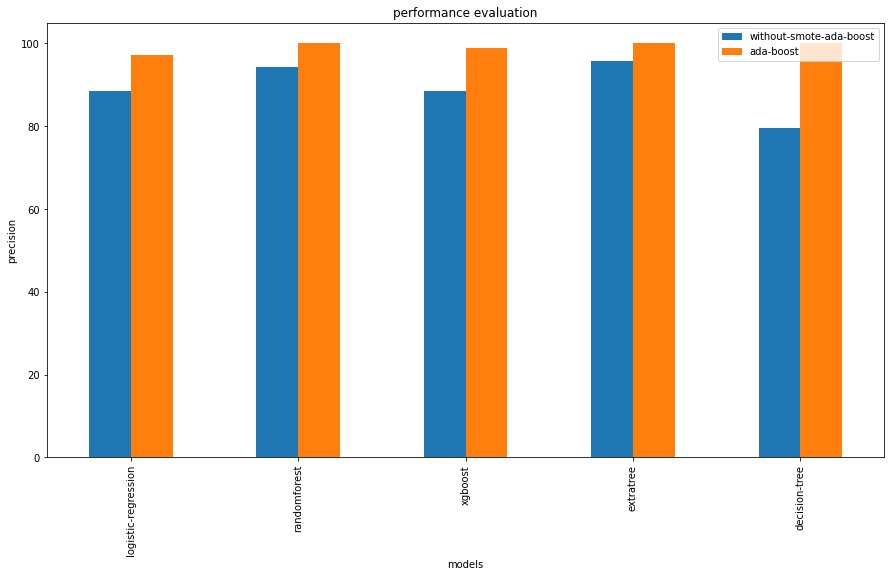

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
perfo=pd.DataFrame({"without-smote-ada-boost" :[88.3495145631068,94.16666666666667, 88.3495145631068, 95.76271186440678,79.41176470588235],"ada-boost" :[97.14607680522671,99.97659093835225, 98.79557057596894,99.97542077295817, 99.97659093835225]},
                   index=["logistic-regression","randomforest","xgboost","extratreel","decision-tree"])

perfo.plot(kind="bar",figsize=(15, 8))

plt.title("performance evaluation")

plt.xlabel("models")

plt.ylabel("precision")


#**Recall**

Text(0, 0.5, 'recall')

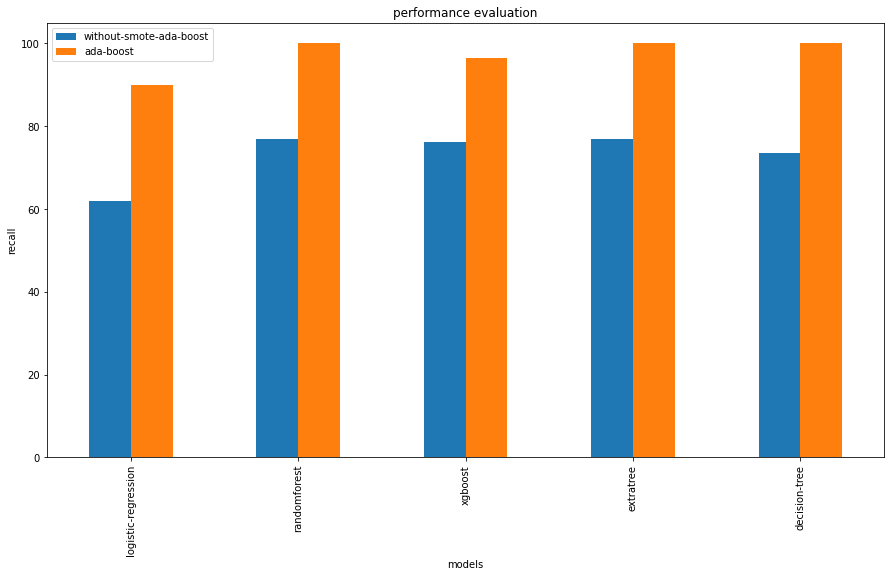

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
perfo=pd.DataFrame({"without-smote-ada-boost" :[61.904761904761905,76.87074829931973,76.19047619047619, 76.87074829931973,73.46938775510205],"ada-boost" :[89.82403971106454, 100.0, 96.5112331268951,100.0, 100.0]},
                   index=["logistic-regression","randomforest","xgboost","extratree","decision-tree"])

perfo.plot(kind="bar",figsize=(15, 8))

plt.title("performance evaluation")

plt.xlabel("models")

plt.ylabel("recall")

#**MCC**

Text(0, 0.5, 'mcc')

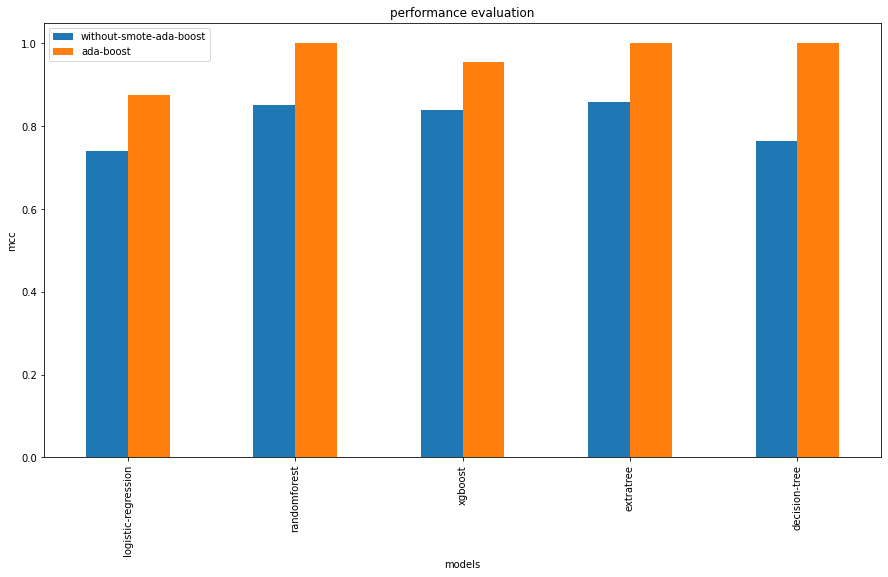

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
perfo=pd.DataFrame({"without-smote-ada-boost" :[ 0.7391854601606261,0.850577831224011, 0.8395379651078461,0.8577719440813301,0.7634375926100958],"ada-boost" :[0.874174998692713,0.9997655452144019, 0.9535366181564433,0.9997538239135595,0.9997655452144019]},
                   index=["logistic-regression","randomforest","xgboost","extratree","decision-tree"])

perfo.plot(kind="bar",figsize=(15, 8))

plt.title("performance evaluation")

plt.xlabel("models")

plt.ylabel("mcc")

#**Plotting ROC Curve**

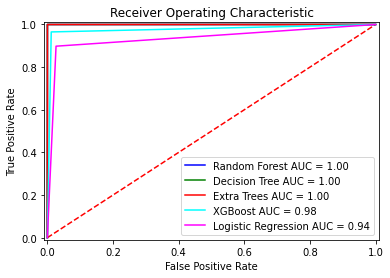

In [ ]:

models = [
          "Random Forest",
          "Decision Tree",
          "Extra Trees",
          "XGBoost",
          "Logistic Regression"
]
preds=[
       rf_ada_pred,
       dt_ada_pred,
       et_ada_pred,
       xg_pred,
       lr_ada_pred
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')

for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, preds[i], models[i])

plt.show()